In [25]:
import logging
from datetime import datetime
from tqdm.auto import tqdm

from importlib import reload

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
log = lambda msg: print(f"{datetime.today()} {msg}")

import pandas as pd
import os

import sys
root_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))
sys.path.append(root_dir)


In [94]:
import paramiko

hostname = os.getenv('SSH_HOST')
username = os.getenv('SSH_USERNAME')
password = os.getenv('SSH_PASSWORD')
remote_dir = '/home/graham/audio'

# Create an SSH client
ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect(hostname, username=username, password=password, compress=True)

stdin, stdout, stderr = ssh.exec_command(f'ls {remote_dir}')
remote_files = [f for f in stdout.read().decode().splitlines() if f.endswith(".opus")]

sftp = ssh.open_sftp()

2025-04-05 10:43:07,207 - INFO - Connected (version 2.0, client OpenSSH_9.6)
2025-04-05 10:43:07,438 - INFO - Authentication (password) successful!
2025-04-05 10:43:10,713 - INFO - [chan 1] Opened sftp connection (server version 3)


In [26]:
from notebooks.Util.DayAndNightOfFinder import day_and_night_of

interesting = [f for f in remote_files if day_and_night_of(f.removeprefix('recording_').removesuffix('.opus')) == '2025-04-01']

In [69]:
interesting2 = [f for f in interesting if f.removesuffix('.opus').split('_')[2].startswith('023')]
interesting2

['recording_20250402_023015.opus',
 'recording_20250402_023045.opus',
 'recording_20250402_023115.opus',
 'recording_20250402_023145.opus',
 'recording_20250402_023215.opus',
 'recording_20250402_023245.opus',
 'recording_20250402_023315.opus',
 'recording_20250402_023345.opus',
 'recording_20250402_023415.opus',
 'recording_20250402_023445.opus',
 'recording_20250402_023515.opus',
 'recording_20250402_023546.opus',
 'recording_20250402_023616.opus',
 'recording_20250402_023646.opus',
 'recording_20250402_023716.opus',
 'recording_20250402_023746.opus',
 'recording_20250402_023816.opus',
 'recording_20250402_023846.opus',
 'recording_20250402_023916.opus',
 'recording_20250402_023946.opus']

recording_20250405_124536.opus:   0%|          | 0.00/413k [00:00<?, ?B/s]

recording_20250405_124536.opus: 100%|##########| 413k/413k [00:01<00:00, 394kB/s]  


Temp filename:  C:\Users\graha\AppData\Local\Temp\tmpcwe1xr0f.opus


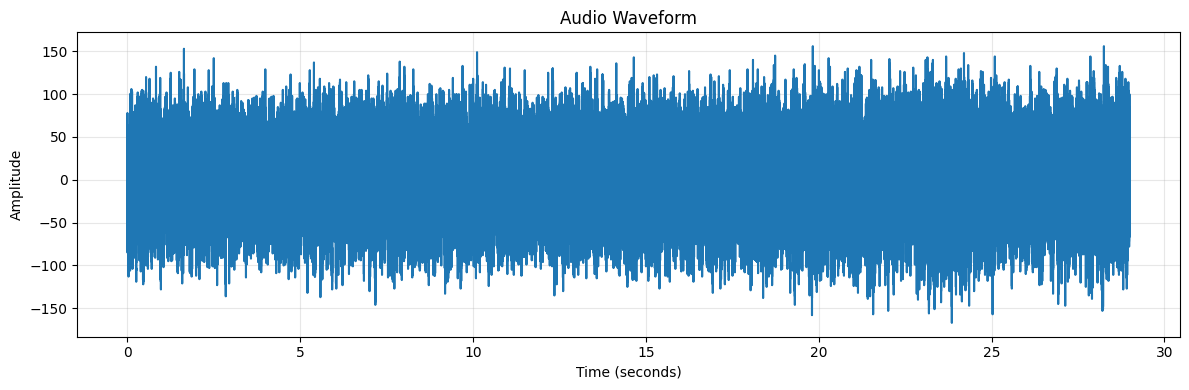

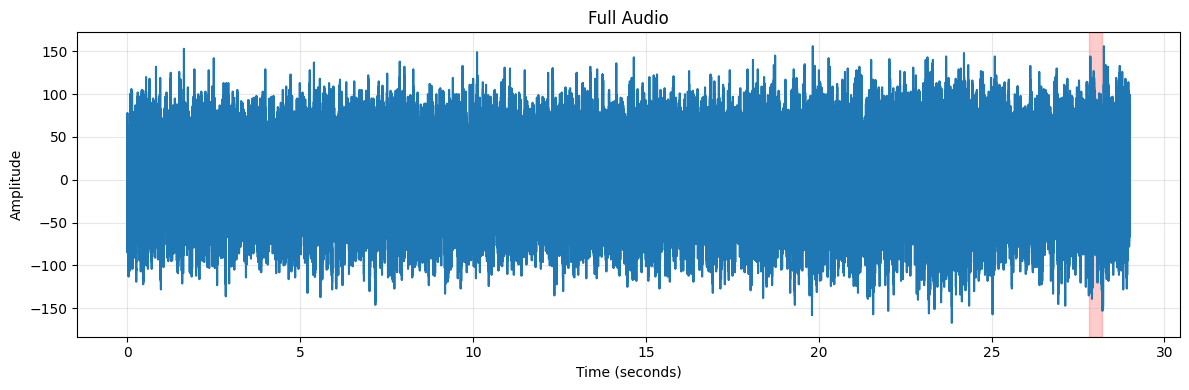

In [96]:

import audio
reload(audio)

remote_dir = '/home/graham/audio'
filename = "recording_20250405_124536.opus"
data_array, ogg = audio.get_audio(sftp, remote_dir, filename)

bp = audio.best_silence_detection_params

sample_rate = ogg.frequency
events = audio.find_audio_events(data_array, sample_rate, filename,
                         window_size=bp['window_size'],
                         threshold_multiplier=bp['threshold_multiplier'],
                         min_event_duration=bp['min_event_duration'],
                         merge_distance=bp['merge_distance'])

display(audio.play_audio_widget(data_array, ogg))

if len(events) > 0:
    # Plot events
    audio.plot_audio_events(data_array, events)
else:
    print("No events found")


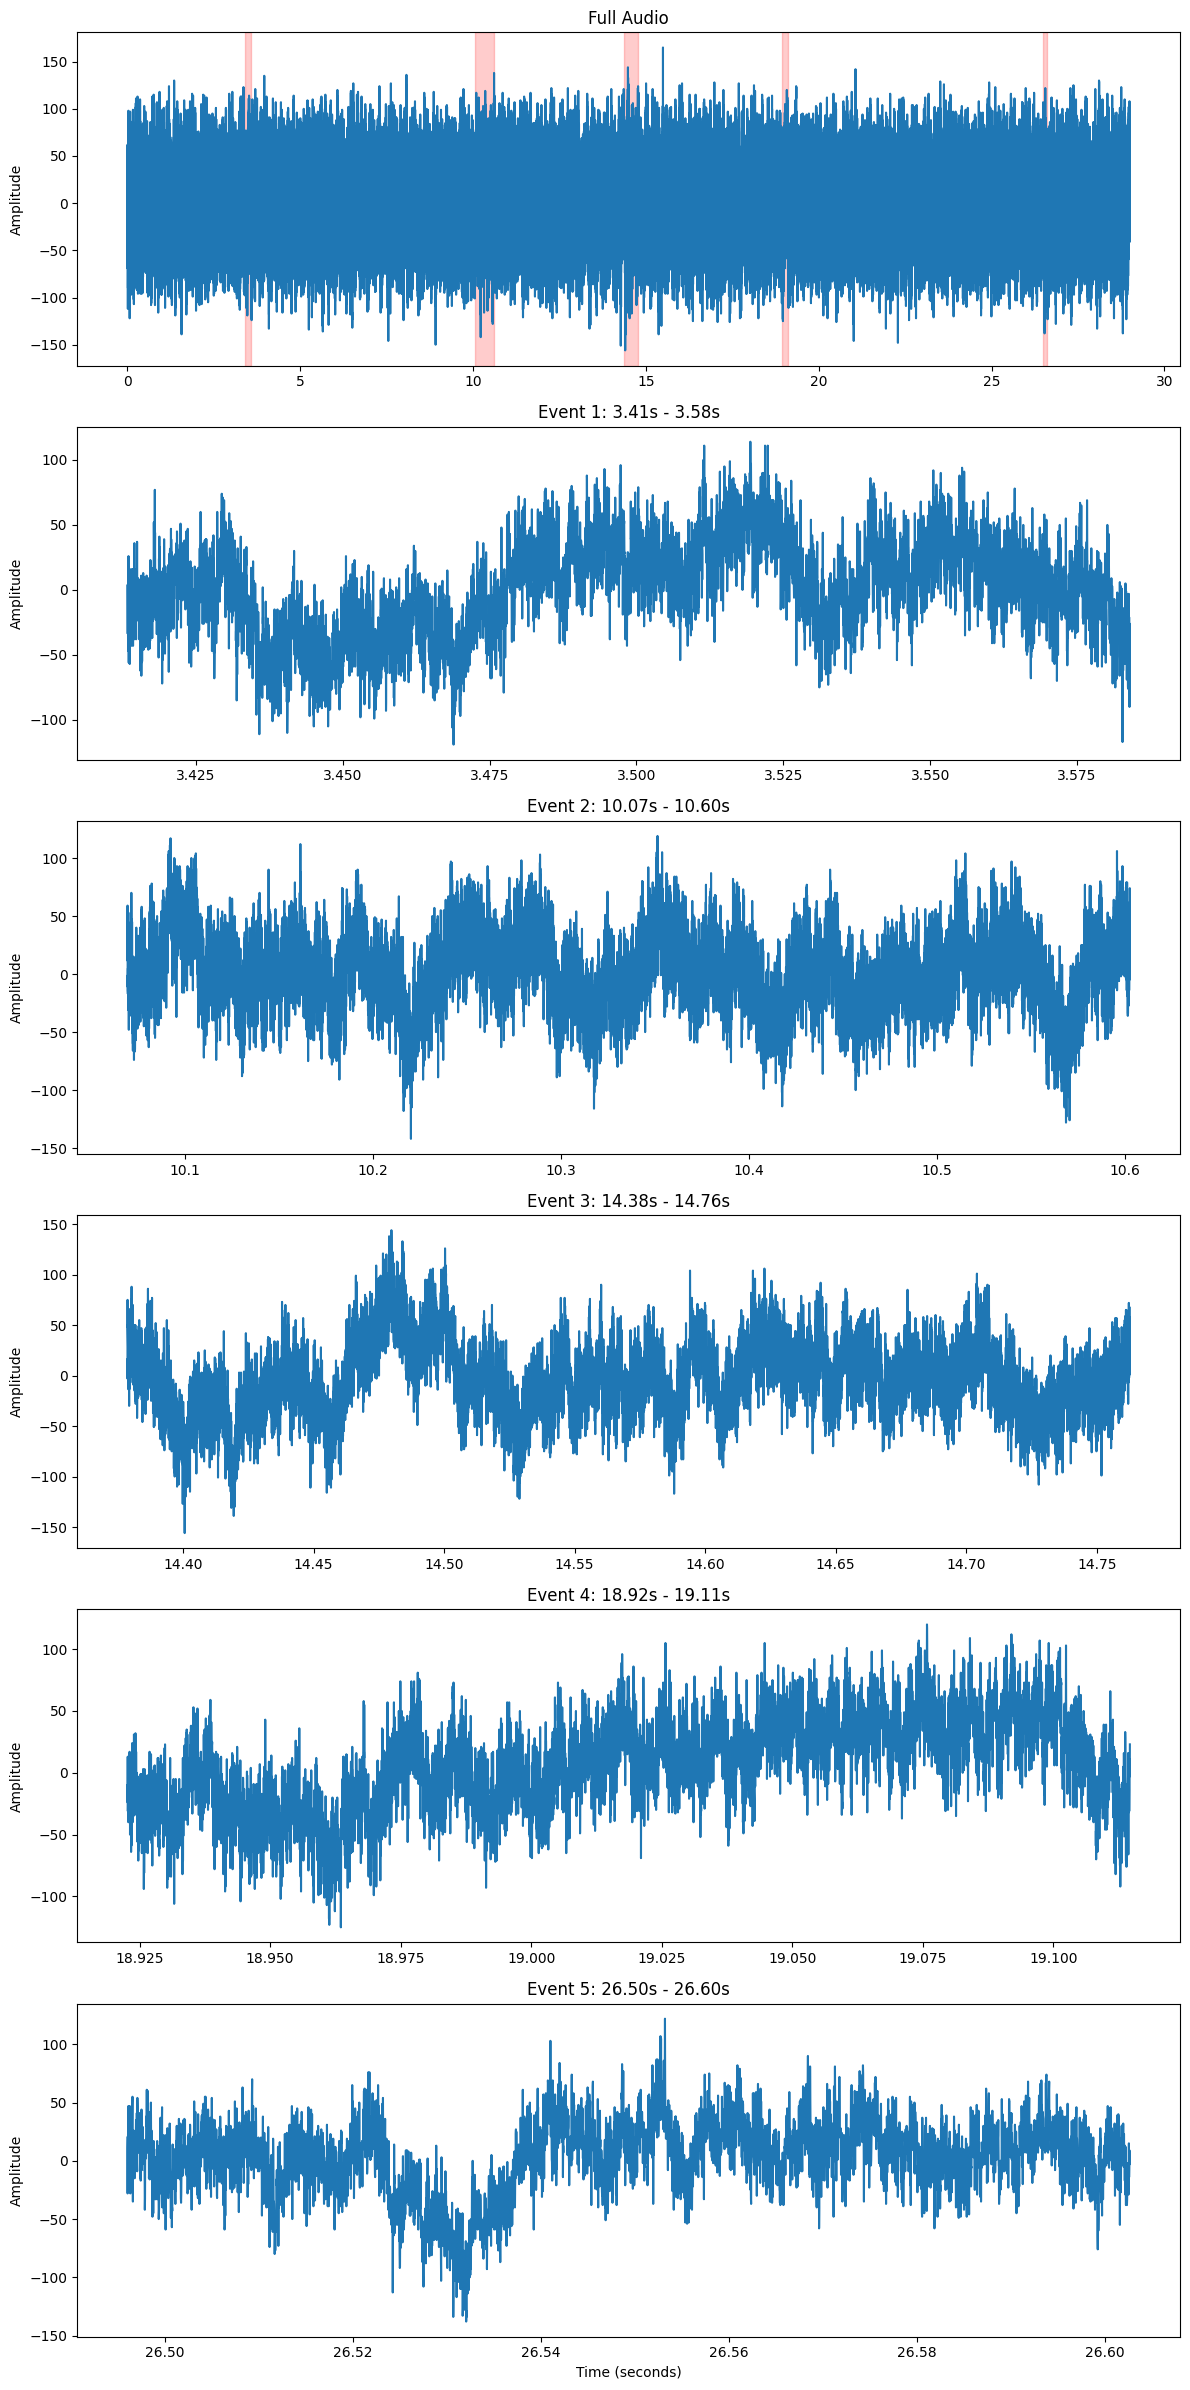

In [9]:
reload(audio)

sample_rate = ogg.frequency
events = audio.find_audio_events(data_array, sample_rate, filename,
                         window_size=1024,
                         threshold_multiplier=1.5,
                         min_event_duration=0.1,
                         merge_distance=0.5)

len(events)

# Plot events
audio.plot_audio_events(data_array, events)

# Play individual events if desired
# for i, (_, _, audio_segment) in enumerate(events, 1):
#     print(f"Event {i}:")
#     display(Audio(data=audio_segment, rate=sample_rate))    